In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import spearmanr,kendalltau,pearsonr

# Задача 1


In [3]:
M = 20
N = 1000
sigma = 0.04
eps = np.random.normal(scale = sigma,size = (M,N))
X = np.random.uniform(size = (M,N))
Ya = np.sin(np.pi*X/2)
Yb = np.sin(np.pi*X/2)+eps
Yc = np.sin(np.pi*X)+eps

In [22]:

spearman_r_a,spearman_p_vlaue_a = spearmanr(X,Ya)
#spearman_r_b,spearman_p_vlaue_b = spearmanr(X,Yb)
#spearman_r_c,spearman_p_vlaue_c = spearmanr(X,Yc)
#sns.boxplot(spearman_r_a)

In [21]:
spearman_r_a.shape

(2000, 2000)

# Задача 2

Найдем MLE для распределения Пуассона:
1. $L(\mu) = \frac{\mu^{\sum\limits_{i=1}^{n}x_i}e^{-n\mu}}{\prod\limits_{i=1}^{n}x_i!}$
2. $ln(L(\mu)) = (\sum\limits_{i=1}^{n}x_i)\cdot ln(\mu)-n\mu-ln(\prod\limits_{i=1}^{n}x_i!)$
3. $\frac{\partial{ln(L(\mu))}}{\partial{\mu}} = \frac{\sum\limits_{i=1}^{n}x_i}{\mu}-n=0 \Rightarrow \hat{\mu} =\frac{\sum\limits_{i=1}^{n}x_i}{n} = \frac{\sum\limits_{k=0}^{4}kO_i}{n}$
$$\boxed{\hat{\mu} = \frac{\sum\limits_{k=0}^{4}kO_i}{n}}$$


In [ ]:
def test(O,p,n):
    # O - наблюдаемые частоты
    # p - Распределение на бинах
    # n - Размер выборки
    E = n*p # Ожидаемые частоты
    Q, p_value = chisquare(O,E,1) 
    result(p_value)    

In [ ]:
def argmin_Q(n,k):
    # Минимизацией статистики критерия хи-квадрат с шагом 0.01
    # n - размер выборки
    # k - количество бинов
    mus = np.arange(0.01,10,step = 0.01)
    Qs = []
    for mu in mus:
        p = np.array([poisson.pmf(i,mu) for i in range(k)])
        E = n*p
        Qs.append(chisquare(O,E)[0])
    return mus[np.argmin(Qs)]
def mle(O,n):
    # Оценка метода максимального правдоподобия
    # O - наблюдаемые частоты
    # n - Размер выборки
    ks = np.arange(0,5)
    return np.sum(ks*O)/n    

In [ ]:
O = np.array([92,46,8,3,1])
n = 150
k = len(O)
mu_mle = mle(O,n)  # Оценка метода максимального правдоподобия
mu_min = argmin_Q(n,k) # Оценка минимизации статистики критерия хи-квадрат
p_mle = np.array([poisson.pmf(i,mu_mle) for i in range(k)])
p_min = np.array([poisson.pmf(i,mu_min) for i in range(k)])
print("Для оценки MLE:")
test(O,p_mle,n)
print("Для оценки минимизации статистики:")
test(O,p_min,n)

Для оценки MLE:
Гипотеза не отклонена на уровне значимости 0.05 при p_value = 0.249
Для оценки минимизации статистики:
Гипотеза не отклонена на уровне значимости 0.05 при p_value = 0.288


**Вывод**:На уровне значимости 0.05 гипотеза о том, что "количество колоний на чашке Петри" имеет распределение Пуассона, не отклонена.

# Задание 3

In [ ]:
data = pd.read_csv('faithful.csv')
X = np.sort(np.array(data['eruptions'])) # Выборка
data.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


**(i) EM-алгоритм**

In [ ]:
estimator = mixture.GaussianMixture(n_components=2)
estimator.fit(X.reshape(-1,1))
# Оцененные параметры
params1 = {'lambda':estimator.weights_[0],
           'mu1':estimator.means_.reshape(2)[0],
           'mu2':estimator.means_.reshape(2)[1],
           'std1':(estimator.covariances_.reshape(2)**0.5)[0],
           'std2':(estimator.covariances_.reshape(2)**0.5)[1]} 

**(ii) Кустарный метод**

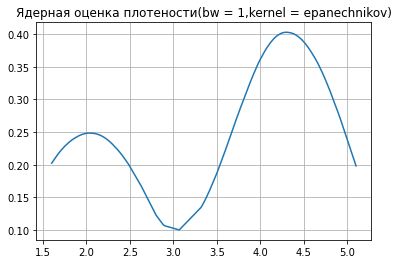

In [ ]:
kde = KernelDensity(kernel='epanechnikov')
kde.fit(X.reshape(-1,1))
pdf = np.exp(kde.score_samples(X.reshape(-1,1)))
plt.plot(X.reshape(-1,1),pdf)
plt.grid()
plt.title('Ядерная оценка плотености(bw = 1,kernel = epanechnikov)');

In [ ]:
# Оцененные параметры
sep_point = 3 # "Разделительная точка"
params2 = {'lambda':len(X[X<sep_point])/len(X),
           'mu1':X[np.argmax(pdf[X<3])],
           'mu2':X[np.argmax(pdf)],
           'std1':np.std(X[X<sep_point]),
           'std2':np.std(X[X>sep_point])} 

* **Визуализация полученных оценок**

In [ ]:
def p(x,params):
    # Плотность распределения с оцененными параметрами
    return params['lambda']*norm.pdf(x,loc=params['mu1'],scale=params['std1'])+\
    (1-params['lambda'])*norm.pdf(x,loc=params['mu2'],scale=params['std2'])

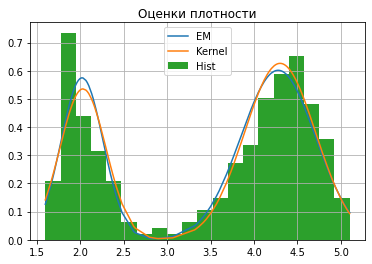

In [ ]:
plt.plot(X,p(X,params1),label='EM')
plt.plot(X,p(X,params2),label='Kernel')
plt.hist(X,bins=20,density=True,label='Hist')
plt.legend()
plt.grid()
plt.title('Оценки плотности');

* **Сравнение методов**

In [ ]:
def F(x,params):
    # Функция распределения с оцененными параметрами
    return params['lambda']*norm.cdf(x,loc=params['mu1'],scale=params['std1'])+\
    (1-params['lambda'])*norm.cdf(x,loc=params['mu2'],scale=params['std2'])


In [ ]:
def get_Expectations(sep_points,params,n):
    # n - Размер выборки 
    # Расчет ожидаемых частот
    p = np.zeros(20) # Распределение на бинах
    for i in range(20):
        if(i==0):
            p[i] = F(sep_points[i+1],params)
        elif(i==19):
            p[i] = 1-F(sep_points[i],params)
        else:
            p[i] = F(sep_points[i+1],params)-F(sep_points[i],params) 
    return n*p              

In [ ]:
sep_points = np.linspace(np.min(X),np.max(X),num=21) # Разбиение области значений на 20 отрезков
O = np.zeros(20) # Наблюдаемые частоты
for i in range(20):
    O[i] = len(X[X<sep_points[i+1]])-len(X[X<sep_points[i]])  
# Ожидаемые частоты для разных оценок    
E_EM = get_Expectations(sep_points,params1,len(X))
E_Kernel = get_Expectations(sep_points,params2,len(X))
Q_em,p_em = chisquare(O,E_EM,ddof=4)
Q_ker,p_ker = chisquare(O,E_Kernel,ddof=4)
print('Значение статистики и p_value для EM-алгоритма: ')
print('Q = ',Q_em,'p_value = ',p_em)
print('Значение статистики и p_value для "кустарного метода": ')
print('Q = ',Q_ker,'p_value = ',p_ker)

Значение статистики и p_value для EM-алгоритма: 
Q =  35.603134734766726 p_value =  0.0020162390280011903
Значение статистики и p_value для "кустарного метода": 
Q =  39.143197266806716 p_value =  0.0006100268535905755


**Вывод**:На основание тестов гипотеза отклоняется на уровне значимости 0.05. Однако визуально данные соответствуют распределению из гипотезы. Результаты теста можно объяснить аномально большими значениями в одном из бинов(около точки 2 на гистограмме).

# Задание 4


Для генерации выбоки из смеси:
$$p_0(x) = (1-\alpha)\lambda_1e^{-\lambda_1x}+\alpha\lambda_2e^{-\lambda_2x}$$
Использовалось:
$$\nu = \begin{cases}1,p=1-\alpha\\ 2 ,p=\alpha\end{cases} X = \begin{cases}X_1\sim Exp(\lambda_1),\nu=1\\ X_2 \sim Exp(\lambda_2),\nu=2 \end{cases}$$
Заметим, что:
1. $P(X<x) = P(X<x|\nu=1)P(\nu=1)+P(X<x|\nu=2)P(\nu=2) = (1-\alpha)P(X_1<x)+\alpha P(X_2<x)$
2. Таким образом $p_X(x) = p_0(x)$


In [ ]:
def gen(N,lambda1,lambda2):
    # Генерация выборки из смеси распределений размера N для разнах долей заявок
    alphas = np.arange(0,1.01,0.01) # Доля заявок второго типа
    Xs = np.zeros((len(alphas),N)) # Выборки
    for i,alpha in enumerate(alphas):
        nus = np.random.choice([1,2],size=N,p=[1-alpha,alpha])
        for j,nu in enumerate(nus):
            if(nu==1):
                Xs[i,j] = expon.rvs(scale=lambda1,size=1)  
            else:  
                Xs[i,j] = expon.rvs(scale=lambda2,size=1)
    return Xs                      

In [ ]:
def F(x,lambda_):
    # Экспоненциальная функция распределения
    return expon.cdf(x,scale=lambda_)

In [ ]:
N = 1000 # Размер выборки
k = 20 # Количество бинов
lambda1 = 30
lambda2 = 500
border = 200
alphas = np.arange(0,1.01,0.01) # Доля заявок второго типа
Xs = gen(N,lambda1,lambda2) # Выборки
Xs = np.array([Xs[i][Xs[i]<border] for i in range(Xs.shape[0])]) # Подвыборки с Xi<200

In [ ]:
sep_points = np.linspace(0,border,num=21) # Разбиение [0,200] на 20 отрезков
ps = np.zeros((len(alphas),k)) # Распределние на отрезках
Os = np.zeros((len(alphas),k)) # Наблюдаемые частоты
Es = np.zeros((len(alphas),k)) # Ожидаемые частоты
Qs = np.zeros(len(alphas)) # Значения статистики критерия 
p_vals = np.zeros(len(alphas)) # Значения p_value
for i in range(len(alphas)):
    X = Xs[i]
    n = len(X) # Размер текущей выборки
    for j in range(k):
        Os[i,j] = len(X[X<sep_points[j+1]])-len(X[X<sep_points[j]])
        if(j==0):
            ps[i,j] = F(sep_points[j+1],lambda1)
        elif(j==19):
            ps[i,j] = 1 - F(sep_points[j+1],lambda1)
        else:        
            ps[i,j] = F(sep_points[j+1],lambda1)-F(sep_points[j],lambda1)
        Es[i,j] = ps[i,j]*n
    Qs[i],p_vals[i] = chisquare(Os[i],Es[i])    


In [ ]:
print("Наибольшая доля заявок второго типа :",alphas[np.max(np.argwhere(p_vals>0.05))])

Наибольшая доля заявок второго типа : 0.18


# Задание 5

In [ ]:
A = np.array([0, 2, 8, 6, 9, 10, 7, 8, 3, 10, 7, 5])
B = np.array([0, 7, 5, 6, 9, 2, 8, 7, 3, 10, 9, 6])
n1 = len(A)
n2 = len(B)
k = 4

**(i)**

In [ ]:
#Наблюдаемые частоты
O1 = np.array([len(A[A<=3]),len(A[(4<=A)&(A<=5)]),len(A[(6<=A)&(A<=7)]),len(A[(8<=A)&(A<=10)])])
O2 = np.array([len(B[B<=3]),len(B[(4<=B)&(B<=5)]),len(B[(6<=B)&(B<=7)]),len(B[(8<=B)&(B<=10)])])
p = (O1+O2)/(n1+n2) # Распределение вероятности на бинах
E1,E2 = n1*p, n2*p # Ожидаемые частоты
O = np.hstack((O1,O2))
E = np.hstack((E1,E2))
Q,p_value = chisquare(O,E,ddof=k-1)
result(p_value)

Гипотеза не отклонена на уровне значимости 0.05 при p_value = 0.993


**(ii)** Гипотеза тестировалась методом, рассмотренным на семинаре

In [ ]:
X = A-B
median = np.median(X)
con_table = np.zeros((3,2)) # Таблица сопряженности 
for i in range(3):
    l = i*4
    r = (i+1)*4
    nl = len(X[l:r][X[l:r]<median])
    nr = len(X[l:r][X[l:r]>=median])
    con_table[i] = np.array([nl,nr])
p_value = chi2_contingency(con_table)[1]   
result(p_value)

Гипотеза не отклонена на уровне значимости 0.05 при p_value = 0.687
